# Classification using K nearest neighbour (KNN) v3

### In the cells below, follow the instructions marked with "-->".

### --> Fung Wai Ki

##### Ref: https://www.kaggle.com/code/zohaib123/telecusts-prediction-k-nearest-neighbors

## 1. About the dataset

This dataset contains 1000 customers records and more than ten features. The target field, called custcat, has four possible values that correspond to the four customer groups, as follows:
</div>
<ol>
<li>Basic Service </li>
<li>E-Service </li>
<li>Plus Service </li>
<li>Total Service</li>
</ol>

<div>
Our objective is to the K-nearest-neighbour classifier, to predict the class of unknown cases.
</div>
    

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
# --> If you see many warning messages, uncomment the following two lines so that those warnings will be suppressed. 
# import warnings
# warnings.filterwarnings('ignore')

## 2. Load the Data

In [19]:
myDF = pd.read_csv("teleCust1000t.csv")

## 3. Examine the data

In [20]:
# The head() method lets you view the first few records of the dataframe. By default, it shows the first 5 records.
myDF.head(3)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3


In [21]:
# You can use a list to extract column(s) from a dataframe
myDF[['age','income']].head(3)

,age,income
0,44,64.0
1,33,136.0
2,52,116.0


## 4. Create the features matrix

In [22]:
X = myDF[['region', 'tenure', 'age', 'marital', 'address', 'income']].values

## 5. Create the labels vector

In [23]:
y = myDF['custcat'].values

## 6. Feature Scaling

In [24]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

## 7. Split into training and testing data

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (800, 6) (800,)
Test set: (200, 6) (200,)


## 8. Create and train the KNN Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
myModel = KNeighborsClassifier(n_neighbors = 4).fit(X_train, y_train)
myModel

KNeighborsClassifier(n_neighbors=4)

## 9. Try the model on the testing data

In [28]:
yhat = myModel.predict(X_test)

In [29]:
# Compare the above with the actual y values here
yhat[0:5]   # predicted values

array([1, 1, 1, 3, 3])

In [30]:
y[0:5]      # actual values

array([1, 4, 3, 1, 3])

## 10. Try the model on different values of K

In [31]:
# --> Modify this cell so that the array mean_acc contains the results of K from 1 to 50.

import sklearn.metrics as metrics

howManyKs = 50
mean_acc = np.zeros((howManyKs - 1))

for n in range(1, howManyKs):

    modelInLoop = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = modelInLoop.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)

print(mean_acc)

[0.25  0.28  0.27  0.29  0.325 0.3   0.31  0.325 0.34  0.335 0.345 0.345
 0.335 0.33  0.335 0.34  0.355 0.325 0.335 0.345 0.325 0.355 0.36  0.335
 0.34  0.345 0.32  0.325 0.335 0.33  0.33  0.35  0.32  0.33  0.335 0.35
 0.355 0.36  0.345 0.33  0.335 0.34  0.33  0.34  0.335 0.335 0.325 0.325
 0.315]


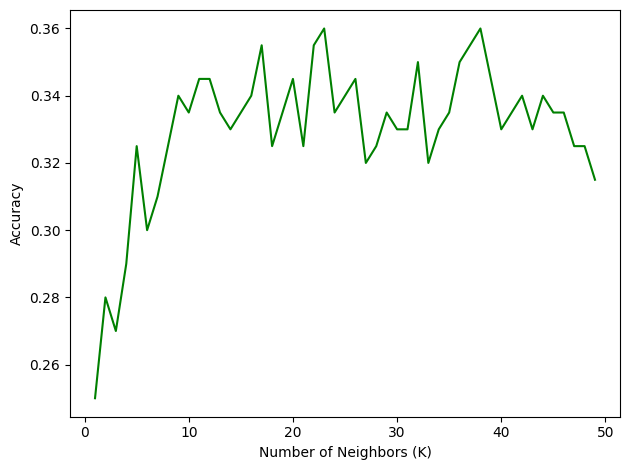

In [32]:
plt.plot(range(1, howManyKs), mean_acc, 'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [33]:
# --> What is the K for the best accuracy now?
# --> Answer: 23

print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.36 with k= 23


# The End